# Congressional Record and Hansard Word Embeddings Analysis


This notebook cotains the code to create a variety of different word embeddings from the Congressional Record and Hansard. Word embeddings are used to investigate the following hypotheses:

- Hypothesis 1 a): Labour and Conservative politicians use more similar language to discuss climate change than they do in general.
- Hypothesis 1 b): The langauge used by Labour and Conservative politicians to discuss climate change has become more similar over time.
- Hypothesis 2: Democrat and Republican politicians use less similar langauage to discuss climate change than they do in general.
- Hypothesis 4: Democrat and Republican politicians use less similar language to discuss climate change than Labour and Conservative politicians.

Word embeddings are generated using the pre-trained `all-MiniLM-L6-v2` model from sentence-transformers.


## Setup


In [1]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

DATA_PATH = 'data/'
DIST_PATH = 'dist/'

plt.style.use('ggplot')

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

congressional_record = pd.read_csv(
    DATA_PATH + 'non_procedural_congressional_record.csv')
hansard = pd.read_csv(DATA_PATH + 'non_procedural_hansard.csv')

climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

/Users/felixwallis/Desktop/UCL Politics and International Relations Course/Dissertation/pir-dissertation/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Generating word embeddings


### Embedding the Congressional Record and Hansard


**Embedding the Congressional Record**


In [2]:
cleaned_stems = congressional_record['cleaned_stems'].tolist()
congressional_record_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'congressional_record_embeddings.npy',
        congressional_record_embeddings)

Batches: 100%|██████████| 16389/16389 [1:28:06<00:00,  3.10it/s]  


**Embedding Hansard**


In [3]:
cleaned_stems = hansard['cleaned_stems'].tolist()
hansard_embeddings = model.encode(cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'hansard_embeddings.npy', hansard_embeddings)

Batches: 100%|██████████| 27807/27807 [57:37<00:00,  8.04it/s]  


### Embedding the Climate Congressional Record and Climate Hansard datasets


**Embedding the Congressional Record**


In [4]:
cleaned_stems = climate_congressional_record['cleaned_stems'].tolist()
climate_congressional_record_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'climate_congressional_record_embeddings.npy',
        climate_congressional_record_embeddings)

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches: 100%|██████████| 86/86 [00:22<00:00,  3.78it/s]


**Embedding Hansard**


In [5]:
cleaned_stems = climate_hansard['cleaned_stems'].tolist()
climate_hansard_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'climate_hansard_embeddings.npy',
        climate_hansard_embeddings)

Batches: 100%|██████████| 782/782 [00:57<00:00, 13.60it/s]


## UMAP Visualisation


These visualisations are primarily exploratory. However, they also give some insight into Hypotheses 1a) and 2 by comparing the similarity of language used by Labour and Conservative politicians and Democrat and Republican politicians respectively.


In [2]:
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')

congressional_record_embeddings = np.load(
    DATA_PATH + 'congressional_record_embeddings.npy')
hansard_embeddings = np.load(DATA_PATH + 'hansard_embeddings.npy')

climate_congressional_record_embeddings = np.load(
    DATA_PATH + 'climate_congressional_record_embeddings.npy')
climate_hansard_embeddings = np.load(
    DATA_PATH + 'climate_hansard_embeddings.npy')

### Visualising the Congressional Record and Hansard embeddings


In [3]:
umap_congressional_record_embeddings = umap_model.fit_transform(
    congressional_record_embeddings)
umap_hansard_embeddings = umap_model.fit_transform(hansard_embeddings)

np.save(DATA_PATH + 'umap_congressional_record_embeddings.npy',
        umap_congressional_record_embeddings)
np.save(DATA_PATH + 'umap_hansard_embeddings.npy', umap_hansard_embeddings)

In [4]:
umap_congressional_record_embeddings = np.load(
    DATA_PATH + 'umap_congressional_record_embeddings.npy')
umap_hansard_embeddings = np.load(DATA_PATH + 'umap_hansard_embeddings.npy')

**Congressional Record versus Hansard**


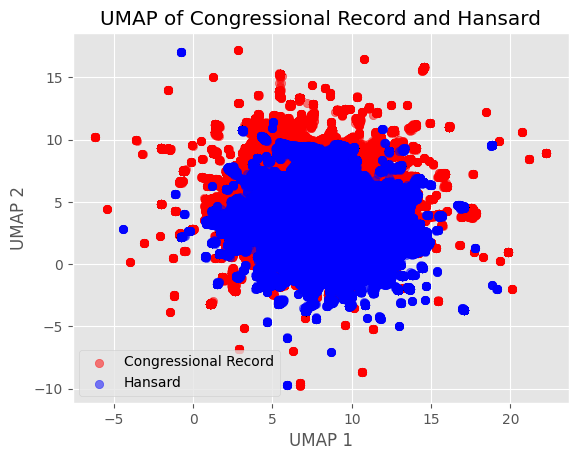

In [5]:
plt.scatter(umap_congressional_record_embeddings[:, 0],
            umap_congressional_record_embeddings[:, 1], alpha=0.5, c='red', label='Congressional Record')
plt.scatter(umap_hansard_embeddings[:, 0],
            umap_hansard_embeddings[:, 1], alpha=0.5, c='blue', label='Hansard')
plt.title('UMAP of Congressional Record and Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Democrat versus Republican**


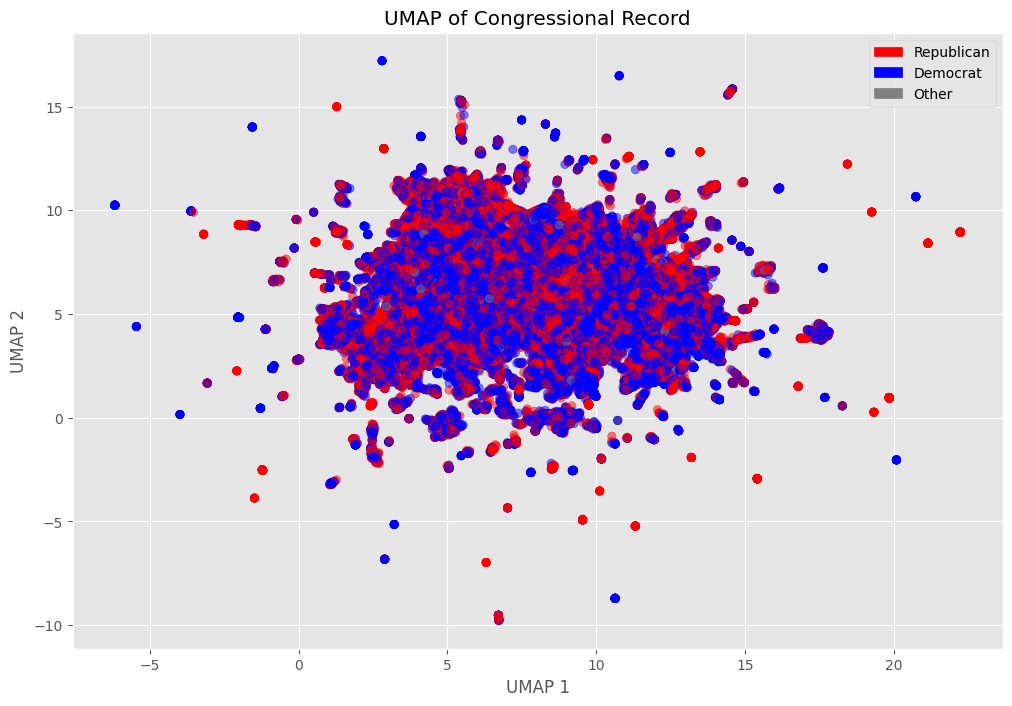

In [6]:
party_colours = {
    'R': 'red',
    'D': 'blue',
}
default_colour = 'grey'
colours = congressional_record['party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_congressional_record_embeddings[:, 0],
            umap_congressional_record_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Congressional Record')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

legend_patches = [
    mpatches.Patch(color='red', label='Republican'),
    mpatches.Patch(color='blue', label='Democrat'),
    mpatches.Patch(color='grey', label='Other')
]
plt.legend(handles=legend_patches)

plt.show()

**Labour versus Conservative**


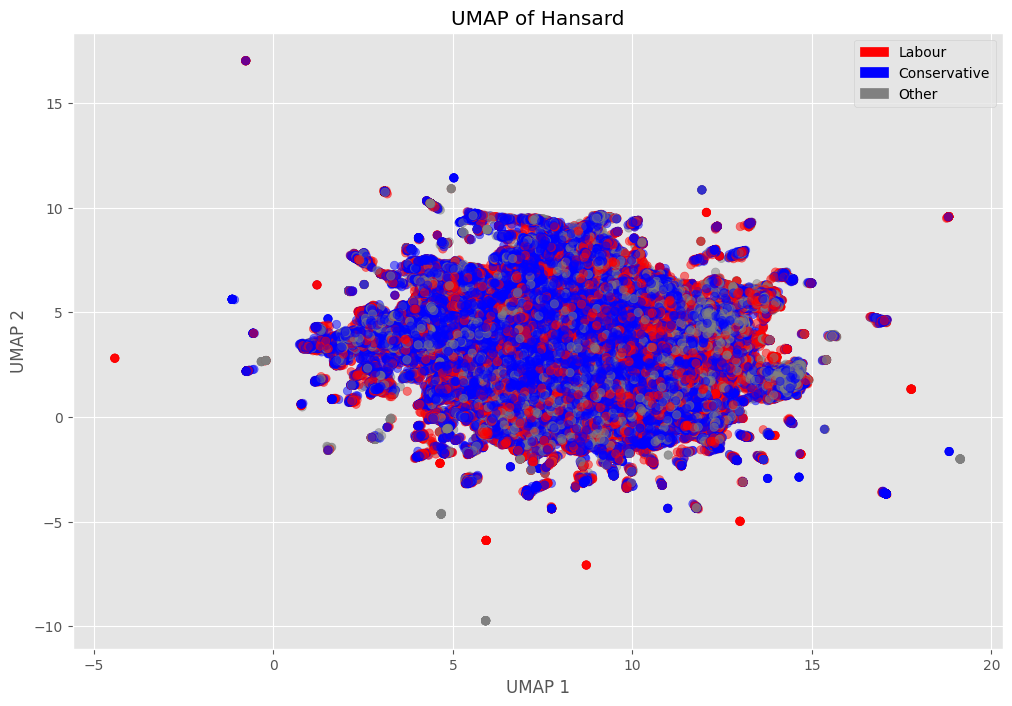

In [7]:
party_colours = {
    'Conservative': 'blue',
    'Labour': 'red',
}
default_colour = 'grey'
colours = hansard['speech_party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_hansard_embeddings[:, 0],
            umap_hansard_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

legend_patches = [
    mpatches.Patch(color='red', label='Labour'),
    mpatches.Patch(color='blue', label='Conservative'),
    mpatches.Patch(color='grey', label='Other')
]
plt.legend(handles=legend_patches)

plt.show()

**Democrat versus Labour**


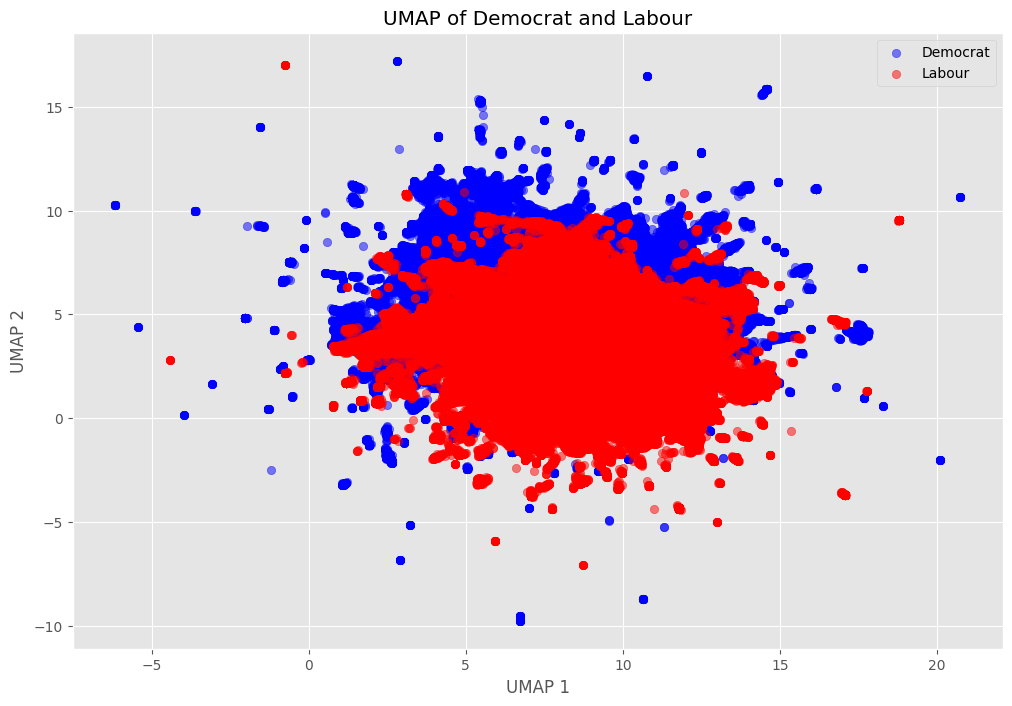

In [8]:
democrat_mask = (congressional_record['party'] == 'D')
labour_mask = (hansard['speech_party'] == 'Labour')

umap_democrat_embeddings = umap_congressional_record_embeddings[democrat_mask]
umap_labour_embeddings = umap_hansard_embeddings[labour_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_democrat_embeddings[:, 0],
            umap_democrat_embeddings[:, 1], alpha=0.5, c='blue', label='Democrat')
plt.scatter(umap_labour_embeddings[:, 0],
            umap_labour_embeddings[:, 1], alpha=0.5, c='red', label='Labour')
plt.title('UMAP of Democrat and Labour')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Republican versus Conservative**


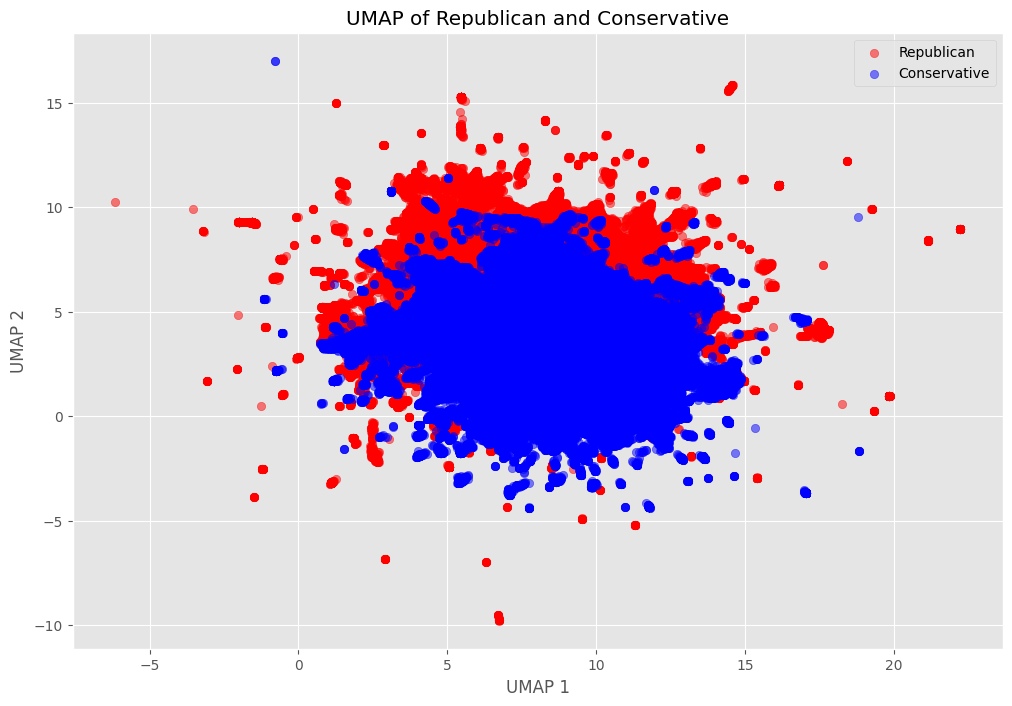

In [9]:
republican_mask = (congressional_record['party'] == 'R')
conservative_mask = (hansard['speech_party'] == 'Conservative')

umap_republican_embeddings = umap_congressional_record_embeddings[republican_mask]
umap_conservative_embeddings = umap_hansard_embeddings[conservative_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_republican_embeddings[:, 0],
            umap_republican_embeddings[:, 1], alpha=0.5, c='red', label='Republican')
plt.scatter(umap_conservative_embeddings[:, 0],
            umap_conservative_embeddings[:, 1], alpha=0.5, c='blue', label='Conservative')
plt.title('UMAP of Republican and Conservative')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

### Visualising the Climate Congressional Record and Climate Hansard embeddings


In [10]:
umap_climate_congressional_record_embeddings = umap_model.fit_transform(
    climate_congressional_record_embeddings)
umap_climate_hansard_embeddings = umap_model.fit_transform(
    climate_hansard_embeddings)

np.save(DATA_PATH + 'umap_climate_congressional_record_embeddings.npy',
        umap_climate_congressional_record_embeddings)
np.save(DATA_PATH + 'umap_climate_hansard_embeddings.npy',
        umap_climate_hansard_embeddings)

In [11]:
umap_climate_congressional_record_embeddings = np.load(
    DATA_PATH + 'umap_climate_congressional_record_embeddings.npy')
umap_climate_hansard_embeddings = np.load(
    DATA_PATH + 'umap_climate_hansard_embeddings.npy')

**Congressional Record versus Hansard**


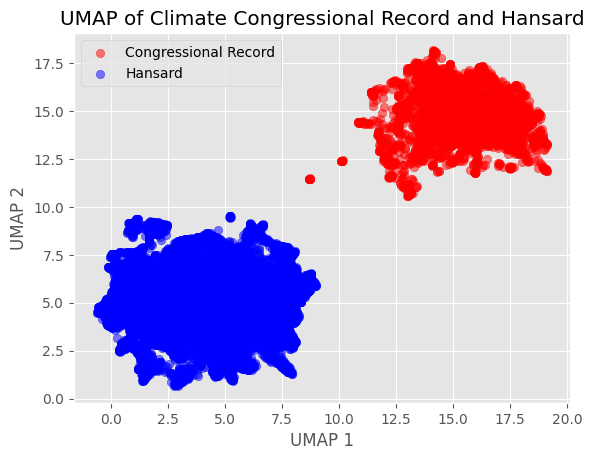

In [12]:
plt.scatter(umap_climate_congressional_record_embeddings[:, 0],
            umap_climate_congressional_record_embeddings[:, 1], alpha=0.5, c='red', label='Congressional Record')
plt.scatter(umap_climate_hansard_embeddings[:, 0],
            umap_climate_hansard_embeddings[:, 1], alpha=0.5, c='blue', label='Hansard')
plt.title('UMAP of Climate Congressional Record and Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Democrat versus Republican**


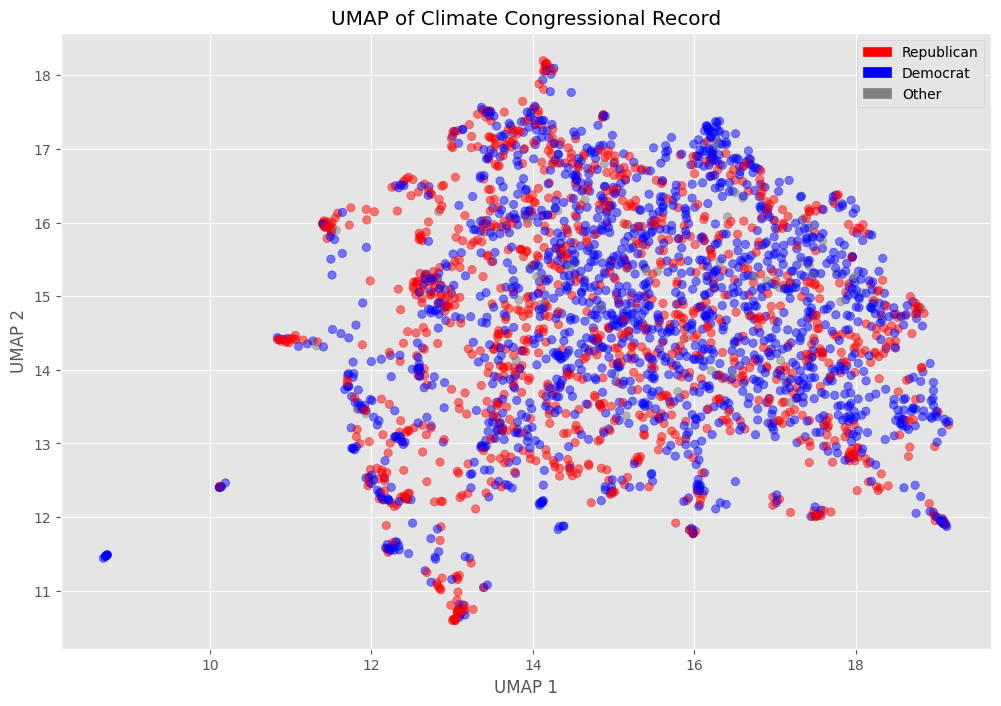

In [13]:
party_colours = {
    'R': 'red',
    'D': 'blue',
}
default_colour = 'grey'
colours = climate_congressional_record['party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_climate_congressional_record_embeddings[:, 0],
            umap_climate_congressional_record_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Climate Congressional Record')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

legend_patches = [
    mpatches.Patch(color='red', label='Republican'),
    mpatches.Patch(color='blue', label='Democrat'),
    mpatches.Patch(color='grey', label='Other')
]
plt.legend(handles=legend_patches)

plt.show()

**Labour versus Conservative**


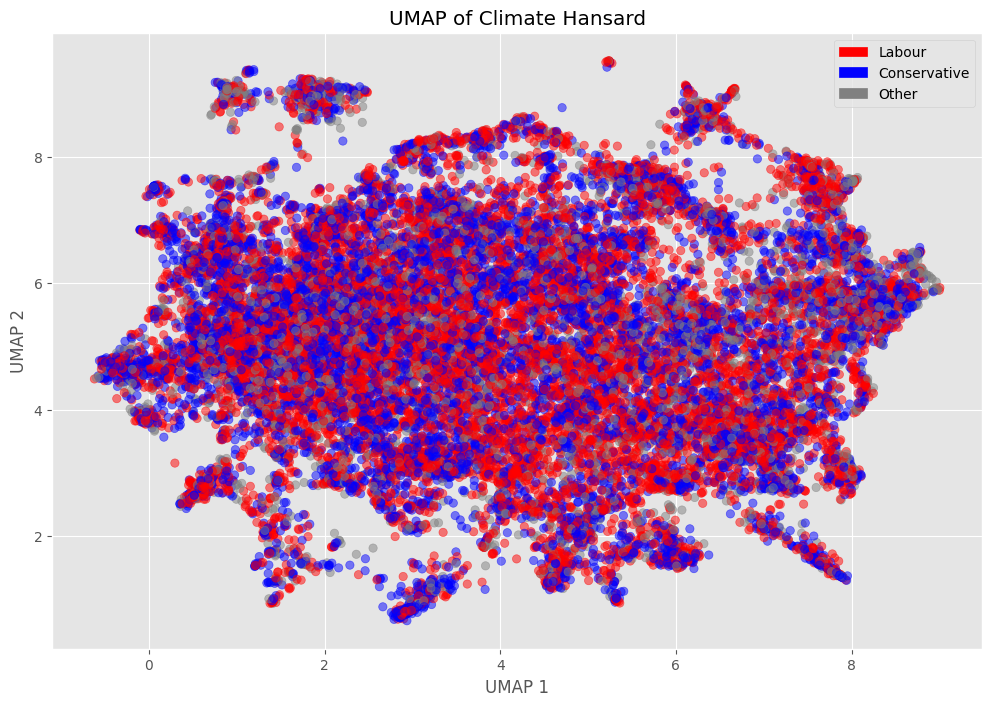

In [14]:
party_colours = {
    'Conservative': 'blue',
    'Labour': 'red',
}
default_colour = 'grey'
colours = climate_hansard['speech_party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_climate_hansard_embeddings[:, 0],
            umap_climate_hansard_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Climate Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

legend_patches = [
    mpatches.Patch(color='red', label='Labour'),
    mpatches.Patch(color='blue', label='Conservative'),
    mpatches.Patch(color='grey', label='Other')
]
plt.legend(handles=legend_patches)

plt.show()

**Democrat versus Labour**


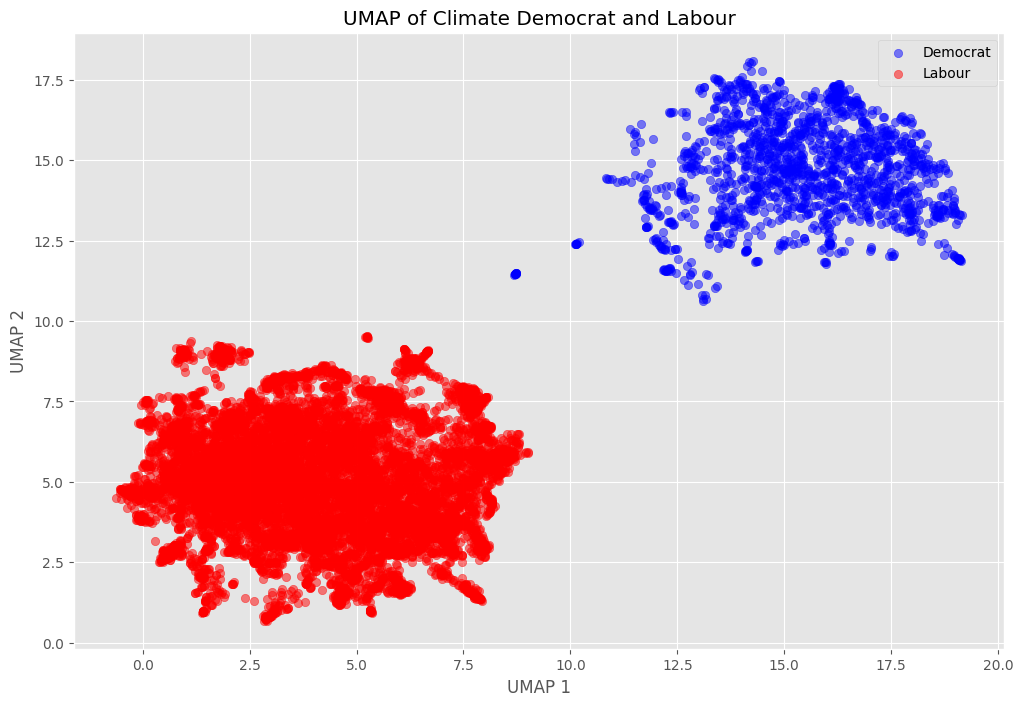

In [15]:
climate_democrat_mask = (climate_congressional_record['party'] == 'D')
climate_labour_mask = (climate_hansard['speech_party'] == 'Labour')

umap_climate_democrat_embeddings = umap_climate_congressional_record_embeddings[
    climate_democrat_mask]
umap_climate_labour_embeddings = umap_climate_hansard_embeddings[climate_labour_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_climate_democrat_embeddings[:, 0],
            umap_climate_democrat_embeddings[:, 1], alpha=0.5, c='blue', label='Democrat')
plt.scatter(umap_climate_labour_embeddings[:, 0],
            umap_climate_labour_embeddings[:, 1], alpha=0.5, c='red', label='Labour')
plt.title('UMAP of Climate Democrat and Labour')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Republican versus Conservative**


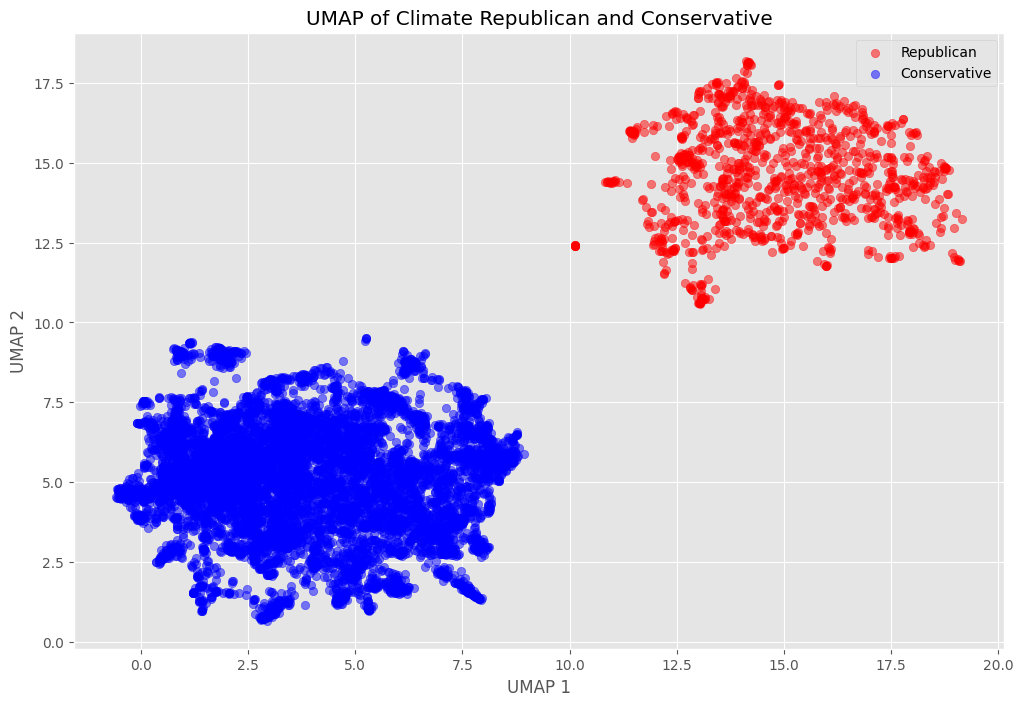

In [16]:
climate_republican_mask = (climate_congressional_record['party'] == 'R')
climate_conservative_mask = (climate_hansard['speech_party'] == 'Conservative')

umap_climate_republican_embeddings = umap_climate_congressional_record_embeddings[
    climate_republican_mask]
umap_climate_conservative_embeddings = umap_climate_hansard_embeddings[
    climate_conservative_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_climate_republican_embeddings[:, 0],
            umap_climate_republican_embeddings[:, 1], alpha=0.5, c='red', label='Republican')
plt.scatter(umap_climate_conservative_embeddings[:, 0],
            umap_climate_conservative_embeddings[:, 1], alpha=0.5, c='blue', label='Conservative')
plt.title('UMAP of Climate Republican and Conservative')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

## Time series analysis


In [17]:
congressional_record_embeddings = np.load(
    DATA_PATH + 'congressional_record_embeddings.npy')
hansard_embeddings = np.load(DATA_PATH + 'hansard_embeddings.npy')

climate_congressional_record_embeddings = np.load(
    DATA_PATH + 'climate_congressional_record_embeddings.npy')
climate_hansard_embeddings = np.load(
    DATA_PATH + 'climate_hansard_embeddings.npy')

### Calculating the centroids of the Congressional Record and Hansard embeddings over time


In [18]:
congressional_record['year_month'] = pd.to_datetime(
    congressional_record['date']).dt.to_period('M')
hansard['year_month'] = pd.to_datetime(
    hansard['speech_date']).dt.to_period('M')

climate_congressional_record['year_month'] = pd.to_datetime(
    climate_congressional_record['date']).dt.to_period('M')
climate_hansard['year_month'] = pd.to_datetime(
    climate_hansard['speech_date']).dt.to_period('M')


def calculate_period_centroids(speeches_df, embeddings, time_range_column: str = 'year_month'):
    centroids = {}
    for period in speeches_df[time_range_column].unique():
        period_speeches = speeches_df[speeches_df[time_range_column] == period]
        period_embeddings = embeddings[period_speeches.index]
        centroid = period_embeddings.mean(axis=0)
        centroids[period] = centroid
    return centroids

**Congressional Record and Hansard Centroids**


In [19]:
congressional_record_centroids = calculate_period_centroids(
    congressional_record, congressional_record_embeddings)
congressional_record_centroids = pd.Series(congressional_record_centroids)

hansard_centroids = calculate_period_centroids(hansard, hansard_embeddings)
hansard_centroids = pd.Series(hansard_centroids)

**Democrat and Republican centroids**


In [20]:
democrat_speeches = congressional_record[congressional_record['party'] == 'D']
democrat_centroids = calculate_period_centroids(
    democrat_speeches, congressional_record_embeddings)
democrat_centroids = pd.Series(democrat_centroids)

republican_speeches = congressional_record[congressional_record['party'] == 'R']
republican_centroids = calculate_period_centroids(
    republican_speeches, congressional_record_embeddings)
republican_centroids = pd.Series(republican_centroids)

**Labour and Conservative centroids**


In [21]:
labour_speeches = hansard[hansard['speech_party'] == 'Labour']
labour_centroids = calculate_period_centroids(
    labour_speeches, hansard_embeddings)
labour_centroids = pd.Series(labour_centroids)

conservative_speeches = hansard[hansard['speech_party'] == 'Conservative']
conservative_centroids = calculate_period_centroids(
    conservative_speeches, hansard_embeddings)
conservative_centroids = pd.Series(conservative_centroids)

### Calculating the centroids of the Climate Congressional Record and Climate Hansard embeddings over time


**Congressional Record and Hansard Centroids**


In [22]:
climate_congressional_record_centroids = calculate_period_centroids(
    climate_congressional_record, climate_congressional_record_embeddings)
climate_congressional_record_centroids = pd.Series(
    climate_congressional_record_centroids)

climate_hansard_centroids = calculate_period_centroids(
    climate_hansard, climate_hansard_embeddings)
climate_hansard_centroids = pd.Series(climate_hansard_centroids)

**Democrat and Republican centroids**


In [23]:
climate_democrat_speeches = climate_congressional_record[
    climate_congressional_record['party'] == 'D']
climate_democrat_centroids = calculate_period_centroids(
    climate_democrat_speeches, climate_congressional_record_embeddings)
climate_democrat_centroids = pd.Series(climate_democrat_centroids)

climate_republican_speeches = climate_congressional_record[
    climate_congressional_record['party'] == 'R']
climate_republican_centroids = calculate_period_centroids(
    climate_republican_speeches, climate_congressional_record_embeddings)
climate_republican_centroids = pd.Series(climate_republican_centroids)

**Labour and Conservative centroids**


In [24]:
climate_labour_speeches = climate_hansard[climate_hansard['speech_party'] == 'Labour']
climate_labour_centroids = calculate_period_centroids(
    climate_labour_speeches, climate_hansard_embeddings)
climate_labour_centroids = pd.Series(climate_labour_centroids)

climate_conservative_speeches = climate_hansard[climate_hansard['speech_party'] == 'Conservative']
climate_conservative_centroids = calculate_period_centroids(
    climate_conservative_speeches, climate_hansard_embeddings)
climate_conservative_centroids = pd.Series(climate_conservative_centroids)

### Creating a dataframe of centroid cosine similarity over time


In [25]:
def calculate_cosine_similarities_over_time(centroids1, centroids2, time_range_column: str = 'year_month'):
    similarities = {}
    for period in centroids1.index:
        if period in centroids2.index:
            similarity = cosine_similarity(
                [centroids1.loc[period]], [centroids2.loc[period]])[0, 0]
            similarities[period] = similarity
    similarities_df = pd.DataFrame({
        time_range_column: list(similarities.keys()),
        'similarity': list(similarities.values())
    })
    return similarities_df


def create_cosine_similarity_df(main_df: pd.DataFrame,
                                centroids1,
                                centroids2,
                                column_name: str,
                                time_range_column: str = 'year_month'):
    similarities_df = calculate_cosine_similarities_over_time(
        centroids1, centroids2)
    similarities_df = similarities_df.rename(
        columns={'similarity': column_name})
    main_df = main_df.join(similarities_df.set_index(
        time_range_column), how='left')
    return main_df


all_dates = pd.date_range(
    start=congressional_record['year_month'].min().to_timestamp(),
    end=congressional_record['year_month'].max().to_timestamp(),
    freq='M'
)
all_dates = all_dates.to_period('M')

cosine_similarities_df = pd.DataFrame(index=all_dates)

# Congressional Record and Hansard cosine similarities
cosine_similarities_df = create_cosine_similarity_df(
    cosine_similarities_df, congressional_record_centroids, hansard_centroids, 'congressional_record_hansard_similarity')

# Democrat and Republican cosine similarities
cosine_similarities_df = create_cosine_similarity_df(
    cosine_similarities_df, democrat_centroids, republican_centroids, 'democrat_republican_similarity')

# Labour and Conservative cosine similarities
cosine_similarities_df = create_cosine_similarity_df(
    cosine_similarities_df, labour_centroids, conservative_centroids, 'labour_conservative_similarity')

# Climate Congressional Record and Hansard cosine similarities
cosine_similarities_df = create_cosine_similarity_df(
    cosine_similarities_df, climate_congressional_record_centroids, climate_hansard_centroids, 'climate_congressional_record_hansard_similarity')

# Climate Democrat and Republican cosine similarities
cosine_similarities_df = create_cosine_similarity_df(
    cosine_similarities_df, climate_democrat_centroids, climate_republican_centroids, 'climate_democrat_republican_similarity')

# Climate Labour and Conservative cosine similarities
cosine_similarities_df = create_cosine_similarity_df(
    cosine_similarities_df, climate_labour_centroids, climate_conservative_centroids, 'climate_labour_conservative_similarity')

cosine_similarities_df = cosine_similarities_df.fillna(method='ffill')

/var/folders/g4/5xzy77v17m1fbt0xq_sn3f140000gn/T/ipykernel_52612/1303352141.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_dates = pd.date_range(
/var/folders/g4/5xzy77v17m1fbt0xq_sn3f140000gn/T/ipykernel_52612/1303352141.py:62: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cosine_similarities_df = cosine_similarities_df.fillna(method='ffill')


### Plotting the centroid cosine similarities over time


In [26]:
timestamps = cosine_similarities_df.index.to_timestamp()

**Congressional Record and Hansard centroid cosine similarities**


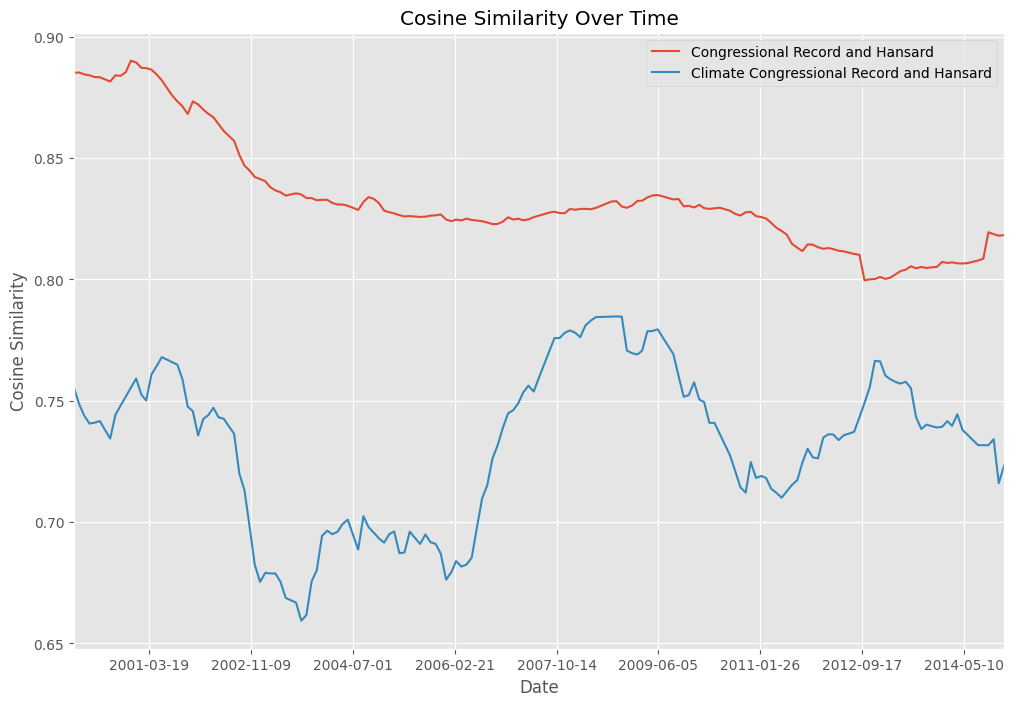

In [35]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(timestamps, cosine_similarities_df['congressional_record_hansard_similarity'].rolling(
    window=24).mean(),
    label='Congressional Record and Hansard')
plt.plot(timestamps, cosine_similarities_df['climate_congressional_record_hansard_similarity'].rolling(
    window=24).mean(),
    label='Climate Congressional Record and Hansard')
plt.title('Cosine Similarity Over Time')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlim(pd.to_datetime("2000-01-01"), pd.to_datetime("2015-01-01"))
plt.xlabel('Date')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()

**Democrat and Republican centroid cosine similarities**


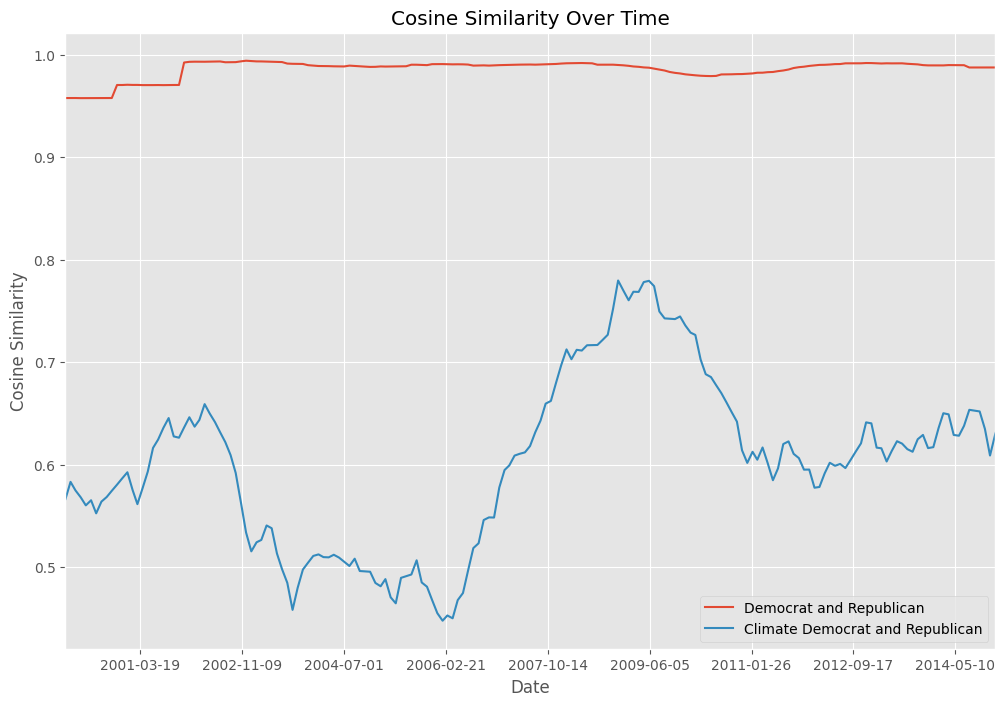

In [36]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(timestamps, cosine_similarities_df['democrat_republican_similarity'].rolling(
    window=24).mean(),
    label='Democrat and Republican')
plt.plot(timestamps, cosine_similarities_df['climate_democrat_republican_similarity'].rolling(
    window=24).mean(),
    label='Climate Democrat and Republican')
plt.title('Cosine Similarity Over Time')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlim(pd.to_datetime("2000-01-01"), pd.to_datetime("2015-01-01"))
plt.xlabel('Date')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()

**Labour and Conservative centroid cosine similarities**


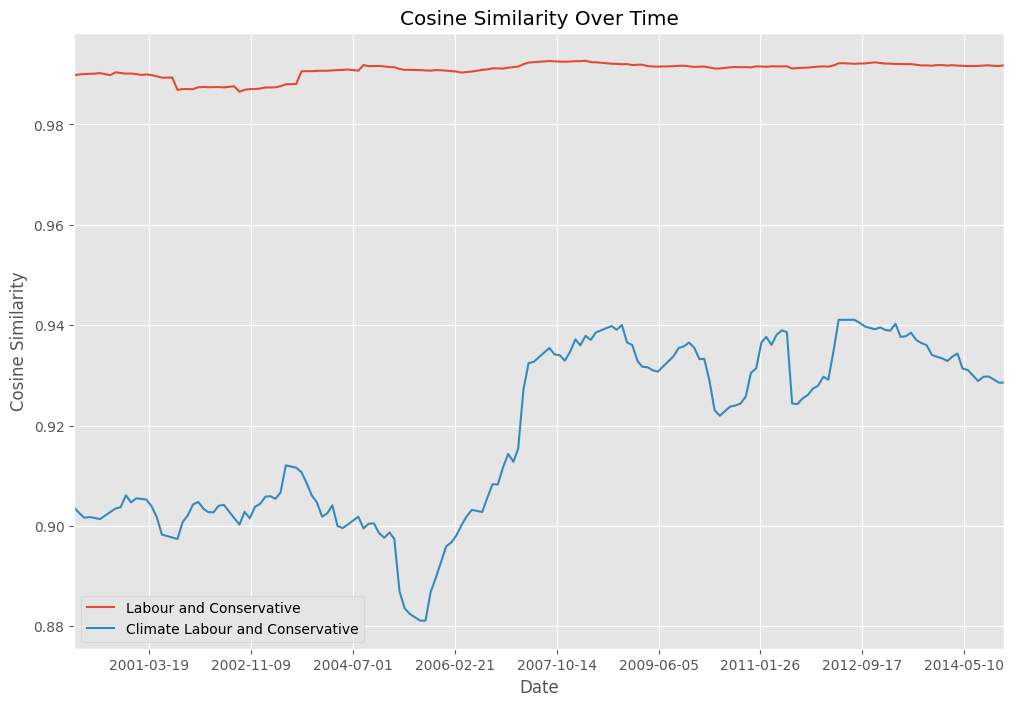

In [37]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(timestamps, cosine_similarities_df['labour_conservative_similarity'].rolling(
    window=24).mean(),
    label='Labour and Conservative')
plt.plot(timestamps, cosine_similarities_df['climate_labour_conservative_similarity'].rolling(
    window=24).mean(),
    label='Climate Labour and Conservative')
plt.title('Cosine Similarity Over Time')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlim(pd.to_datetime("2000-01-01"), pd.to_datetime("2015-01-01"))
plt.xlabel('Date')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()

**Democrat and Republican and Labour and Conservative centroid cosine similarities**


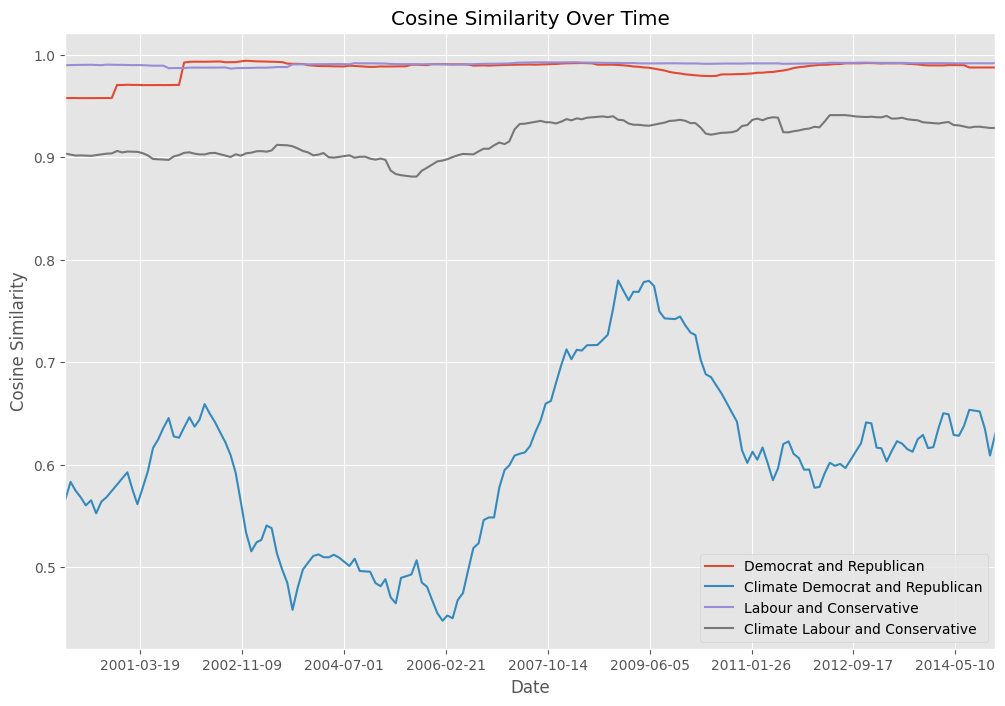

In [38]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(timestamps, cosine_similarities_df['democrat_republican_similarity'].rolling(
    window=24).mean(),
    label='Democrat and Republican')
plt.plot(timestamps, cosine_similarities_df['climate_democrat_republican_similarity'].rolling(
    window=24).mean(),
    label='Climate Democrat and Republican')
plt.plot(timestamps, cosine_similarities_df['labour_conservative_similarity'].rolling(
    window=24).mean(),
    label='Labour and Conservative')
plt.plot(timestamps, cosine_similarities_df['climate_labour_conservative_similarity'].rolling(
    window=24).mean(),
    label='Climate Labour and Conservative')
plt.title('Cosine Similarity Over Time')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlim(pd.to_datetime("2000-01-01"), pd.to_datetime("2015-01-01"))
plt.xlabel('Date')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()